# Logistic Regression for Classification

## Introduction

The problem of classification deals with *categorical* data. In this problem, we wish to identify a set of data whether they belong to a particular class of category. For example, a given text message from an email, we would like to classify if it is a spam or not a spam. Another example would be given some measurement of cancer cells we wish to classify if it is benign or malignant. In this section we will learn logistic regression to solve this classification problem.

## Hypothesis Function

Let's take an example of breast cancer classification problem. Let's say depending on the cell size, an expert can identify if the cell is benign or malignant. We can plot something like the following figure.

![](https://www.dropbox.com/s/drkggfjxttwjjfu/cancer_cell_plot.png?raw=1)

In the y-axis, value of 1 means it is a malignant cell while value of 0 means it is benign. The x-axis can be considered as a normalized size of the cell with mean 0 and standard deviation of 1 (recall z-normalization).

If we can model this plot as a function $p(x)$, we can set the following criteria to classify the cells. For example, we will predict it is malignant if $p(x) \geq 0.5$, otherwise, it is benign. This means we need a function where we can model the data in a step wise manners and fulfills the following:

$$0 \leq p(x) \leq 1$$

where $p(x)$ is the probability that a cell with feature $x$ is a malignant cell. 

One of the function that we can use that have this step-wize shape and the above properties is a logistic function. A logistic function can be written as.

$$y = \frac{1}{1 + e^{-z}}$$

The plot of a logistic function looks like the following.

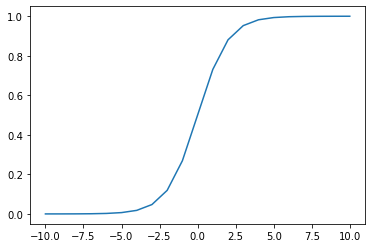

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.array(range(-10,11))
y = 1/(1+np.exp(-z))
plt.plot(z,y)

We can write our hypothesis as follows.

$$p(x) = \frac{1}{1 + e^{-z(x)}}$$

where $z$ is a function of $x$. What should be this $z$ function. We can then use our linear model of a straight line and transform it into a logistic function if we use the following transformation.

$$z(x) = \beta_0 x_0 + \beta_1 x_1$$

when $x_0 = 1$, the above equation is simply the straight line equation of linear regression.

$$\beta_0 + \beta_1 x_1$$

This is the case when we only have one feature $x_1$. If we have more than one feature, we should write as follows.

$$z(x) = \beta_0 x_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

Note that in this notes we tend to omit the *hat* symbol to indicate it is the estimated parameters as in the previous notes. We will just indicate the estimated parameters as $\beta$ instead of $\hat{\beta}$. 

The above relationship shows that we can map the value of linear regression into a new function with a value from 0 to 1. This new function $p(x)$ can be considered as *an estimated probability* that $y = 1$ on input $x$. For example, if $p(x) = 0.7$ this means that 70% chance it is malignant. We can then use the following boundary conditions:
- y = 1 (malignant) if $p(x) \geq 0.5$
- y = 0 (benign) if $p(x) < 0.5$

The above conditions also means that we can classify $y=1$ when $\beta^T x \geq 0$ and $y = 0$ when $\beta^T x < 0$. We can draw these boundary conditions.

![](https://www.dropbox.com/s/ncflm4853mdy8es/decision_boundary.png?raw=1)

In the figure above, we indicated the predicted label $y$ with the orange colour. We see that when $p(x)\geq 0.5$, the data is marked as $y=1$ (orange). On the other hand, when $p(x) \leq 0.5$, the data is marked as $y=0$ (orange). The thick black line shows the decision boundary for this particular example. 

How do we get this boundary decision. Once we found the estimated values for $\beta$, we can find the value of $x$ which gives $\beta^Tx = 0$. You will work on computing the parameters $\beta$ in the problem set. For now, let's assume that you manage to find the value of $\beta_0 = -0.56$ and $\beta_1 = 1.94$. The equation $\beta^T x = 0 $ can be written as follows.

$$\beta_0 + \beta_1 x = 0$$

We can then substitute the values for $\beta$ into the equation.

$$-0.56 + 1.94 x = 0$$
$$x = 0.29 \approx 0.3$$

From the figure above, this fits where the thick line is, which is at around 0.3.

## Cost Function

Similar to linear regression, our purpose here is to find the parameters $\beta$. To do so, we will have to minimize some cost function using optimization algorithm. 

For logistic regression, we will choose the following cost function.

$$J(\beta) = \frac{1}{m} \Sigma_{i=1}^m \left\{ \begin{matrix}
-\log(p(x)) & \text{ if } y = 1\\
-\log(1 - p(x)) & \text{ if } y = 0
\end{matrix}\right.$$

We can try to understand the term inside the bracket intuitively. Let's see the case when $y=1$. In this case, the cost term is given by:

$$-\log(p(x))$$

The cost is 0 if $y = 1$ and $p(x) = 1$ because $-\log(z)$ is 0 when $z=1$. Moreover, as $p(x) \rightarrow 0$, the cost will reach $\infty$. [See plot by wolfram alpha](https://www.wolframalpha.com/input/?i=-log%28x%29+from+0+to+1).

On the other hand, when $ y = 0$, the cost term is given by:

$$-\log(1-p(x))$$

In this case, the cost is 0 when $p(x) = 0$ but it reaches $\infty$ when $p(x) \rightarrow 1$. [See plot by wolfram alpha](https://www.wolframalpha.com/input/?i=-log%281-x%29+from+0+to+1). 

We can write the overall cost function for all the data points from $i=1$ to $m$ as follows.

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

Notice that when $y^i = 1$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(p(x^i)) \right]$$

and when $y^i = 0$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(1 - p(x^i))\right]$$

## Gradient Descent

We can find the parameters $\beta$ again by using the gradient descent algorithm to perform:

$$\begin{matrix}
min & J(\beta)\\
\beta & \end{matrix}$$

The update functions for the parameters are given by

$$\beta_j = \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)$$

The derivative of the cost function is given by

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$

See the appendix for the derivation. We can substitute this in to get the following update function.

$$\beta_j = \beta_j - \alpha \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$


## Matrix Notation

The above equations can be written in matrix notation so that we can perform a vectorized computation. 

### Hypothesis Function

Recall that our hypothesis can be written as:

$$p(x) = \frac{1}{1 + e^{-z(x)}}$$

where

$$z(x) = \beta_0 x_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

We can write this equation as vector multiplication as follows.

$$z = \mathbf{b}^T \mathbf{x}$$

and

$$p(x) = \frac{1}{1 + e^{-\mathbf{b}^T \mathbf{x}}}$$

where

$$\mathbf{b} = \begin{bmatrix}
\hat{\beta}_0\\
\hat{\beta}_1 \\
\ldots\\
\hat{\beta}_n
\end{bmatrix}$$

and
$$\mathbf{x} = \begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\ldots \\
x_n \\
\end{bmatrix}$$

Recall that this is for a single data with $n$ features. The result of this vector multiplication $z$ is a single number for that one single data with $n$ features. 



What about if we have more that one data. Let's say if we have $m$ rows of data, We have to rewrite the $\mathbf{x}$ vector as a matrix $\mathbf{X}$.

$$\mathbf{X} = \begin{bmatrix}
1 & x_1^1 & x_2^1 & \ldots & x_n^1 \\
1 & x_1^2 & x_2^2 & \ldots & x_n^2 \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
1 &x_1^m & x_2^2 & \ldots & x_n^m 
\end{bmatrix}$$

In the above notation, we put the features as the columns and the different row as different rows in the matrix. With $m$ rows of data, our $z$ values is now a vector $\mathbf{z}$.

$$\mathbf{z} = \mathbf{b}^T \mathbf{X}^T$$

The above equation results in a **row** vector. If we prefer to keep it as a column vector, we can transpose it as follows.

$$\mathbf{z} = (\mathbf{b}^T \mathbf{X}^T)^T$$

We can have the same column vector by putting the matrix $\mathbf{X}$ on the left hand side of the matrix multiplication. 

$$\mathbf{z} = \mathbf{X} \mathbf{b}$$

And now our hypothesis for $m$ rows of data can be written as


$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

### Cost Function

Recall that the cost function for all the data points from $i=1$ to $m$ as follows.

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

Notice that when $y^i = 1$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(p(x^i)) \right]$$

and when $y^i = 0$, the function reduces to

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(1 - p(x^i))\right]$$

How can we vectorize this computation in Python? Numpy provides the function `np.where()` which we can use if we have more than one computation depending on certain conditions. 

For example, if we have an input `x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`, we can compute the value of y on whether $x$ is even or odd. Let's say, we will square the value if the value is even. On the other hand, we will leave the value as it is if it is odd. Below cell shows how the code can be written.

In [6]:
# create a list from 0 to 9
x = list(range(10))

# using np.where()
y = np.where(np.mod(x,2) == 0, np.power(x,2), x)
print(y)

[ 0  1  4  3 16  5 36  7 64  9]


We can, thus, use `np.where()` to calculate the cost function depending on whether $y^i$ is 1 or zero using the two equations above. The summation in the above equation can be computed using `np.sum()`.

An example of using `np.sum()` can be seen in the below cell.

In [7]:
# create a list from 0 to 9
x = list(range(10))

# using np.sum() to sum up all the numbers in the vectors
y = np.sum(x)
print(y)

45


If you are dealing with a matrix, you can specify the axis of `np.sum()` whether you want to sum over the rows or the columns. By default is over the rows or `axis=0` in Numpy.

In [9]:
x = [[1, 2, 3], [4, 5, 6]]
print(np.sum(x, axis=0))


[5 7 9]


In the above code we sum over the rows and so we have three values for each column. If we wish to sum over all the columns, we should do as the one below.

In [10]:
x = [[1, 2, 3], [4, 5, 6]]
print(np.sum(x, axis=1))

[ 6 15]


In the above output, we see that 6 is the sum of `[1, 2, 3]` and 15 is the sum of `[4, 5, 6]`. 

### Gradient Descent Update

Recall that the update function in our gradient descent calculation was the following.

$$\beta_j = \beta_j - \alpha \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$

We can write this a vectorized calculation particularly because we have the summation of some multiplication terms. This sounds like a good candidate for a matrix multiplication. Recall that our hypothesis for $m$ data points is a column vector.

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

Similarly, $y$ which is the actual target value from the training set can be written as a column vector of size $m\times 1$. Therefore, we can do the calculation element-wise for the following term.

$$\mathbf{p} - \mathbf{y}$$

The result is a column vector too.

The features $x_j^i$ can be arranged as a matrix as shown below.

$$\mathbf{X} = \begin{bmatrix}
1 & x_1^1 & x_2^1 & \ldots & x_n^1 \\
1 & x_1^2 & x_2^2 & \ldots & x_n^2 \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
1 &x_1^m & x_2^2 & \ldots & x_n^m 
\end{bmatrix}$$

We can do the multiplication and the summation as a matrix multiplication of the following equation.

$$\mathbf{X}^T(\mathbf{p} - \mathbf{y})$$

Note that we transpose the matrix $\mathbf{X}$ so that it has the shape of $(1+n) \times m$. In this way, we can do matrix multiplication with $(\mathbf{p} - \mathbf{y})$ which has the shape of $m \times 1$. 

The rest of the computation is just a multiplication of some constants. So we can write our update function as follows.

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$

## Multi-Class

Since Logistic function's output range only from 0 to 1, does it mean that it can only predict binary classification, i.e. classification problem involving only two classes? The answer is no. We can extend the technique to apply to multi-class classification by using a technique called one-versus-all. 

The idea of one-versus-all technique is to reduce the multi-class classification problem to binary classification problem. Let's say we have three class and we would like to predict between cat, dog, and fish images. We can treat this problem as binary classification by predicting if an image is a cat or no cat. In this first instance, we treat both dog and fish images as a no-cat image. We then repeat the same procedures and try to predict if an image is a dog or a no-dog image. Similarly, we do the same with the fish and no-fish image. 

To facilitate this kind of prediction, instead of having **one** target column in the **training set** , we will be preparing **three** target columns, each column for each class. We need to prepare something like the following data set.

| feature_1 | feature_2 | cat | dog | fish |
|-----------|-----------|-----|-----|------|
| x         | x         | 1   | 0   | 0    |
| x         | x         | 1   | 0   | 0    |
| x         | x         | 0   | 1   | 0    |
| x         | x         | 0   | 0   | 1    |
| x         | x         | 0   | 1   | 0    |

We can then train the model **three times** and obtain the coefficients for **each class**. In this example, we would have **three sets** of beta coefficients, one for the cat versus no-cat, another one for dog versus no-dog, and the last one for fish versus no-fish. We can then use these coefficients to calculate the probability for each class and produce the probability

Recall that our hypothesis function returns a probability between 0 to 1.

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{Xb}}}$$

We can then construct three columns where each column contains the probability for the particular binary classification relevant to the column target. For example, we can have something like the following table.

| feature_1 | feature_2 | cat | dog | fish | predicted class |
|-----------|-----------|-----|-----|------|-------|
| x         | x         | **0.8** | 0.2 | 0.3  | cat   |
| x         | x         | **0.9** | 0.1 | 0.2  | cat   |
| x         | x         | 0.5 | **0.9** | 0.4  | dog   |
| x         | x         | 0.3 | 0.2 | **0.8**  | fish  |
| x         | x         | 0.1 | **0.7** | 0.5  | dog   |

In the above example, the first two rows have cat class as their highest probability. Therefore, we set "cat" as the predicted class in the last column. On the other hand, the third and the last row have "dog" as their highest probability and therefore, they are predicted as "dog". Similarly, with "fish" in the second last row.

# Appendix

## Derivation of Logistic Regression Derivative 



We want to find $\frac{\partial}{\partial \beta_j}J(\beta)$, where

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

To simplify our derivation, we will consider each case when $y=1$ and when $y=0$. When $y=1$, the cost function is given by

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(p(x^i)) \right]$$

Derivating this with respect to $\theta$ is

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma \frac{1}{p(x)}\frac{\partial}{\partial \beta}p(x)$$

Recall that the expression for the hypothesis is

$$p(x) = \frac{1}{1 + e^{-\beta^T x}}$$

The derivative of this is given by

$$\frac{\partial}{\partial \beta_j} p(x) = - \frac{1}{(1 + e^{-\beta^T x})^2} \times -x_j \times e^{-\beta^T x}$$

or

$$\frac{\partial}{\partial \beta_j} p(x) =  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$

We can then now substitute this back 

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma (1 + e^{-\beta^T x}) \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2}$$

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})}$$

This can be written as

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma  p(x) x_j e^{-\beta^T x}$$
This is for the case of $y = 1$.

Now let's do the same for $y = 0$, the cost function is given by

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m  \log(1 - p(x^i))\right]$$

Derivating this with respect to $\theta$ gives

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1}{1 - p(x)}\frac{\partial}{\partial \beta}p(x)$$


Substituting expression for the hypothesis function and its derivative  gives us

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1}{1 - \frac{1}{1 + e^{-\beta^T x}}}  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$


$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{1 + e^{-\beta^T x}}{e^{-\beta^T x}}  \frac{x_j e^{-\beta^T x}}{(1 + e^{-\beta^T x})^2} $$

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma \frac{x_j}{(1+e^{\beta^T x})} $$

$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma p(x) x_j$$
This is for $y = 0$.

Combining for both cases $y=0$ and $y=1$, we have

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m y^i p(x) x_j e^{-\beta^T x} + (y^i - 1)  p(x) x_j^i$$


$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m y^i p(x) x_j e^{-\beta^T x} + y^i   p(x) x_j - p(x) x_j^i$$

$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m \left(y^i p(x)(1 + e^{-\beta^T x})  - p(x) \right)x_j^i$$
$$\frac{\partial}{\partial \beta_j}J(\beta) = -\frac{1}{m}\Sigma_{i=1}^m \left(y^i   - p(x) \right)x_j^i$$
$$\frac{\partial}{\partial \beta_j}J(\beta) = \frac{1}{m}\Sigma_{i=1}^m \left(p(x)-y^i  \right)x_j^i$$